# Titanic Survivability
## Introduction
<p>On 15 April 1912, Titanic, the largest ship of its time, sank after hitting an iceberg in the North Atlantic Ocean. Of the 2,224 people estimated on board, only 705 survived. Although limited, there were enough lifeboats to save 1,178 people and yet fewer made it.</p>

## Questions
<p>How likely would a passenger survive the tragedy?</p>

- If you are rich, would you most likely be prioritized?
- "Women and Children First". Does your age or gender influence your chances of survivability?
    
### Objectives
<p>This study analyzes the likelihood of survivability of passengers on board of the Titanic. The analysis is divided according to Demographics and Social Economic Status. The former will be based on Gender and Age and the latter will be based on Ticket Class and Fare.</p>

### Variables
Dependent Variable: If the passenger survived or not. <br>
Independent Variables: 1. Gender 2. Age 3. Ticket Class 4. Fare. <br>
Null Hypothesis: The likelihood of surviving the event are not influenced by demographics and socio economic status. <br> 
Hypothesis: The likelihood of survival is influenced by the demographics and socio economic status of the passengers.

## Data Wrangling
### Data Acquisition
<p>The data provided is a list of names of 891 of the 2,224 passengers with the corresponding information for each on board. Below is the Data Dictionary of the data set from [Kaggle](https://www.kaggle.com/c/titanic/data).</p>

- survival: Survival (0 = No, 1 = Yes)
- pclass: Ticket class (1st = Upper, 2nd = Middle, 3rd = Lower)
- sex: Sex
- Age: Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
- sibsp: # of siblings / spouse aboard the Titanic (Sibling = brother, sister, stepbrother, stepsister, Spouse = husband, wife (mistresses and fiancés were ignored))
- parch: # of parents / children aboard the Titanic (Parent = mother, father, Child = daughter, son, stepdaughter, stepson, Some children travelled only with a nanny, therefore parch=0 for them.)
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin number
- embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np
# Graphing
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
titanic_df = pd.read_csv('titanic-data.csv') # Read CSV and stores in to titanic_df variable.

### Data Cleaning
<p>Once my file is loaded, I check if there are duplicate values in any of the column that could affect the analysis. I am also looking for inconsistencies in values, data type or missing values that may affect the investigation.</p>

In [2]:
# PassengerId and Name must be unique. I check if there are any duplicate values in each col.
# There are no duplicates on the data.
print titanic_df.duplicated('PassengerId').sum()
print titanic_df.duplicated('Name').sum()
# I also check if the Ticket # is unique. Turns out that the Ticket isn't unique for each passenger.
# Seems odd and I will take note and come back to it if needed.
print titanic_df.duplicated('Ticket').sum()

0
0
210


In [3]:
# I check the data type of each column for any inconsistencies. Seems odd to have Age as an float64.
# I investigate and print out a couple of rows with non-whole number age.
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Saw 7 entries that are less than 1. Looking at their names, I see prefix "Master",
# which is what is given to children. In these case, these were babies below the age of 1.
non_whole = titanic_df['Age'] < 1
titanic_df[non_whole]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [5]:
# I check the head of the data set.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# and the tail.
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Looking at Age col, I see that there are some empty fields. I check how many there are.
missing_age = titanic_df['Age'].isnull()
print 'There are {} logs with their Age not specified.'.format(missing_age.sum())

There are 177 logs with their Age not specified.


## Exploratory
### Women and Children First
<p>The 177 logs that have missing age will affect the analysis. I attempt to limit the descrepency by rephrasing my question to distinguish the survivability between women and children vs Male adult passengers.</p>

In [9]:
titanic_df['womChil'] = 0 # Created a column that groups women and children.
women = titanic_df['Sex'] == 'female' # Criteria - all female passengers.
child = titanic_df['Age'] < 19 # Criteria - all children under the age of 18 years.
# For passengers with missing age, I identify the children from the group of male passengers by looking 
# for the title 'Master' in their Names, which are titles given to minors on board without their
# parents.
masters = titanic_df['Name'].str.contains('Master') # Criteria - all male children.
titanic_df.loc[(women | child | masters),'womChil'] = 1 # Add 1 (yes) that fits the criterias
women_children = titanic_df['womChil'] == 1 # Criteria - all Women and Children.
survived = titanic_df['Survived'] == 1 # Criteria - all passengers that survived.

# Extracted all women and children that sruvived.
women_children_survived = titanic_df[women_children & survived]
women_children_survived['PassengerId'].count() # Counted the women and children survivors.
print "Of the {} passengers that survived from the sample of 891 on the data provided, {} are \
women and children.".format(titanic_df[survived]['PassengerId'].count(), \
                            women_children_survived['PassengerId'].count())

Of the 342 passengers that survived from the sample of 891 on the data provided, 259 are women and children.


In [10]:
# Knowing that 259 of the passengers fit the criteria of women and children, I double check on
# the remaining survivors that did not fit the criteria and whose age were missing from the records
# and try find any other clue that might distinguish the the male passengers as children.
non_womChil = titanic_df['womChil'] == 0
print titanic_df[non_womChil & survived & missing_age]['Age'].isnull().sum()
titanic_df[non_womChil & survived & missing_age].sort_values('Pclass')

14


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,womChil
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,0
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S,0
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,0
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S,0
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C,0
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S,0
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q,0


In [11]:
def survivability(data, criteria):
    yes = data[criteria & survived]['PassengerId'].size
    whole = data[criteria]['PassengerId'].size
    chances = (float(yes) / float(whole))* 100
    return chances

In [12]:
survive_womenAndChild = survivability(titanic_df, women_children)
survive_men = survivability(titanic_df, non_womChil)

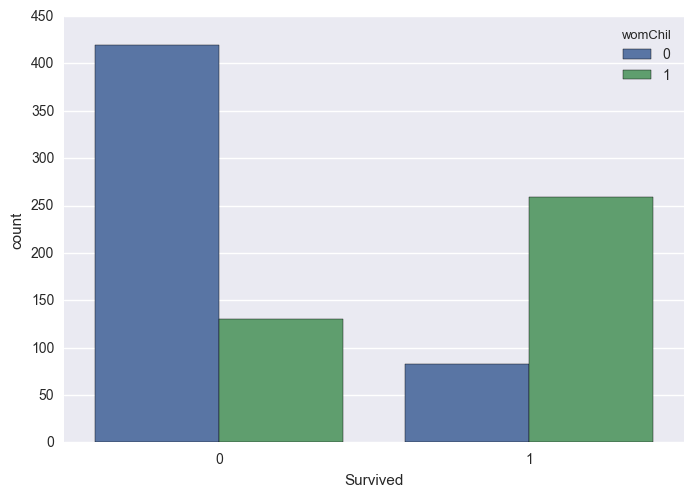

Women and Children had a 66.58% chance of surviving the tragedy
Men only had a 16.53% chances of surviving the tragedy


In [13]:
## There is no more criteria we can use to identify the remaining surviving male passengers with 
## no specified age as children. We then move on and draw our conclusions.
ax = sns.countplot(x='Survived', hue='womChil', data=titanic_df)
sns.plt.show()

print "Women and Children had a {0:.2f}% chance of surviving the tragedy".format(survive_womenAndChild)
print "Men only had a {0:.2f}% chances of surviving the tragedy".format(survive_men)


### Preferential Treatment
<p> We move on to the next question, would rich people have a higher chances of surviving the tragedy than the rest of the people on board Titanic?</p>

In [14]:
# To answer the question, we group the passengers according to Pclass and see the describe info.
# There were 216 Passengers in Upper Class. Their Fare price has a maximum value of 512.33.
# There are 184 Passengers in the Middle Class. Max Fare is 73.50
# There are 491 Passengers in the Lowest Class. Max Fare is 69.50
passengers_by_class = titanic_df.groupby(['Pclass'])
passengers_by_class.describe()

Age        Fare       Parch  PassengerId       SibSp  \
Pclass                                                                      
1      count  186.000000  216.000000  216.000000   216.000000  216.000000   
       mean    38.233441   84.154687    0.356481   461.597222    0.416667   
       std     14.802856   78.380373    0.693997   246.737616    0.611898   
       min      0.920000    0.000000    0.000000     2.000000    0.000000   
       25%     27.000000   30.923950    0.000000   270.750000    0.000000   
       50%     37.000000   60.287500    0.000000   472.000000    0.000000   
       75%     49.000000   93.500000    0.000000   670.500000    1.000000   
       max     80.000000  512.329200    4.000000   890.000000    3.000000   
2      count  173.000000  184.000000  184.000000   184.000000  184.000000   
       mean    29.877630   20.662183    0.380435   445.956522    0.402174   
       std     14.001077   13.417399    0.690963   250.852161    0.601633   
       min      0.670000    0.000000    0.000000    10.000000    0.000000   
       25%     23.000000   13.000000    0.000000   234.500000    0.000000   
       50%     29.000000   14.250000    0.000000   435.500000    0.000000   
       75%     36.000000   26.000000    1.000000   668.000000    1.000000   
       max     70.000000   73.500000    3.000000   887.000000    3.000000   
3      count  355.000000  491.000000  491.000000   491.000000  491.000000   
       mean    25.140620   13.675550    0.393075   439.154786    0.615071   
       std     12.495398   11.778142    0.888861   264.441453    1.374883   
       min      0.420000    0.000000    0.000000     1.000000    0.000000   
       25%     18.000000    7.750000    0.000000   200.000000    0.000000   
       50%     24.000000    8.050000    0.000000   432.000000    0.000000   
       75%     32.000000   15.500000    0.000000   666.500000    1.000000   
       max     74.000000   69.550000    6.000000   891.000000    8.000000   

                Survived     womChil  
Pclass                                
1      count  216.000000  216.000000  
       mean     0.629630    0.458333  
       std      0.484026    0.499418  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      1.000000    0.000000  
       75%      1.000000    1.000000  
       max      1.000000    1.000000  
2      count  184.000000  184.000000  
       mean     0.472826    0.494565  
       std      0.500623    0.501335  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    1.000000  
       max      1.000000    1.000000  
3      count  491.000000  491.000000  
       mean     0.242363    0.405295  
       std      0.428949    0.491450  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    1.000000  
       max      1.000000    1.000000

In [15]:
# Seems odd that on the 3 classes, the minimum Fare is 0, which is free.
# I check the Fare priced at 0.
free = titanic_df['Fare'] == 0
freeloaders = titanic_df[free]
freeloaders # Looks like some of these are crew of the titanic but I can't be sure.
# Might be too complicated to include the Fare in my analysis. I ignore it and move on.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,womChil
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0


In [16]:
# I create criteria for each of the class and see how many survived for each.
first = titanic_df['Pclass'] == 1
second = titanic_df['Pclass'] == 2
third = titanic_df['Pclass'] == 3
non_survived = titanic_df['Survived'] == 0

In [17]:
survive_first = survivability(titanic_df, first)
survive_second = survivability(titanic_df, second)
survive_third = survivability(titanic_df, third)
print "{0:.2f}% of the First Class Passengers survived.".format(survive_first)
print "{0:.2f}% of the Second Class Passengers survived.".format(survive_second)
print "{0:.2f}% of the Third Class Passengers survived.".format(survive_third)

62.96% of the First Class Passengers survived.
47.28% of the Second Class Passengers survived.
24.24% of the Third Class Passengers survived.


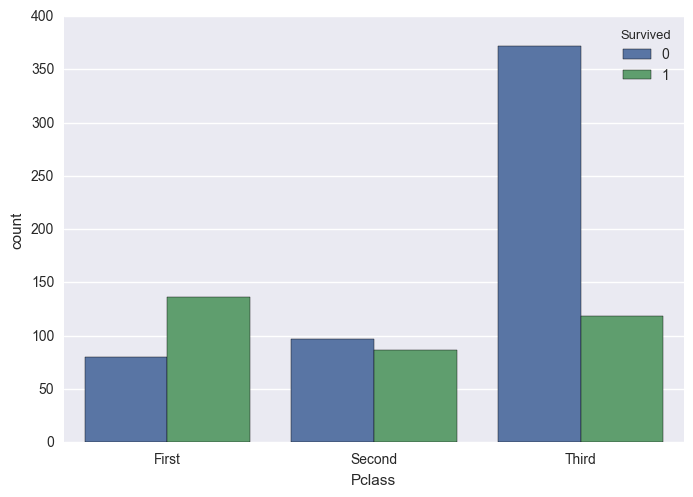

You have a 62.96% chance of surviving the tragedy if you were a First Class Passenger,
than if you were in 3rd Class, who only had a 24.24% chance of surviving.


In [18]:
ax = sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
ax.set_xticklabels(['First', 'Second', 'Third'])

sns.plt.show()
print "You have a {0:.2f}% chance of surviving the tragedy if you were a First Class Passenger," \
.format(survive_first)
print "than if you were in 3rd Class, who only had a {0:.2f}% chance of surviving." \
.format(survive_third)

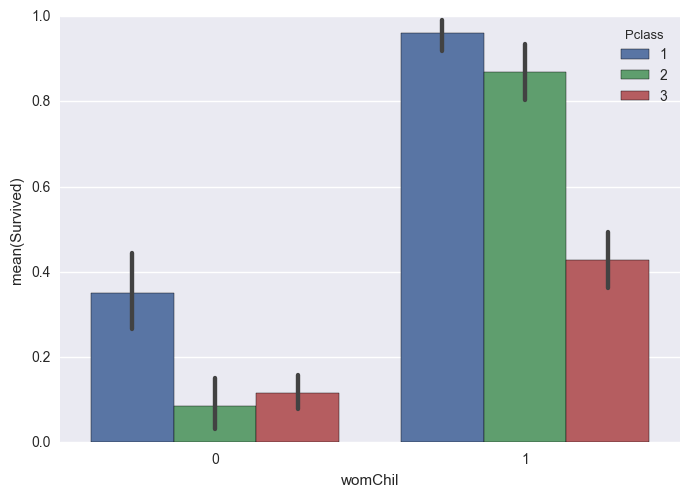

In [22]:
g = sns.barplot(x="womChil", y="Survived", hue="Pclass", data=titanic_df)
sns.plt.show()
print "If we look at the average count of women and children survivors for each class, it seems that, \
in passenger class, women and children had a higher chances of survival if you were in the upper class \
than if you were in the lower class."

## Conclusions
<p>Looking back on the questions that were asked at the beginning, we can observe certain 
relations towards survivability of passengers with their Demographics and Socia Economic.
</p>

### "Women and Children First". Does your age or gender influence your chances of survivability?

<p>With the data provided, it seems that women and children have a higher chances of suriving the tragedy than that of adult males. 67% of the women and children survived the tragedy while only 17% of the adult males survived. Please take note that analysis is limited to the fact that some of the passenger's age were missing in the dataset and that it may skew results.
</p>

### If you are rich, would you most likely be prioritized?

<p>The answer to this question is most probably. Looking at the data grouped according to the Passenger Class, it would seem that the higher you are in the passenger class, the higher your chances of surviving the tragedy. 63% of the  First Class Passengers survived the tragedy. While only 48% of the Second Passengers survived and only 24% of the Third Class Passengers survived. Please take note that this part of the analysis is limited to the fact that there is no direct relationship between socio-economic status and their class. In other words, we cannot be sure that First Class passengers are rich and the rest of the passengers are poor. It would be great to have more details about each passenger such as their occupation or income for example. I looked at the Ticket Fare, but it seems that some passengers had 0 Fare, which could mean many things hence could not be a great basis in this part of the analysis.
</p>